# Часть 1. Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Задание 1 ★☆☆

Изобразите график функции по заданным точкам x и y.
Подпишите оси, дайте название графику, изобразите сетку серым цветом прерывистой линией толщиной 0.3.  
Изобразите график в диапазоне $x$ от -20 до 20  и $y$ от -20 до 20.

In [2]:
t = np.linspace(-20, 20, 1000)
x = 16 * np.power(np.sin(t), 3)
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

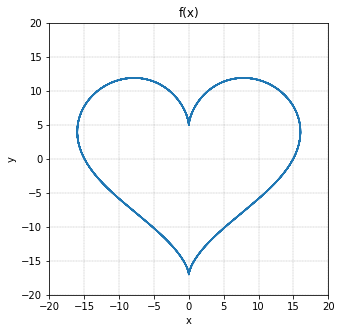

In [8]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x)")
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.xlim((-20, 20))
plt.ylim((-20, 20))
plt.show()

# TODO

На что похож график функции?  
Варианты в форме:
   - цветок
   - вертикальная восьмерка
   - __сердечко__
   - ничего из вышеперечисленного

# Задание 2 ★★☆

Изобразите 6 графиков (2 x 3) функции  
$$f(x) = \frac{15}{\sqrt{(225 - x^2)^2 + 4z^2x^2}}$$ 
для различных значений параметра $z$.   
Для каждого графика сделайте подписи осей, нарисуйте сетку, подпишите график в соответвии со значением параметра $z$ графики должны быть достаточно разнесены, так чтобы надписи не перекрывались. Все графики должны быть в одинаковом масштабе, выберете пределы изменений для $x$ и $y$ самомтоятельно.

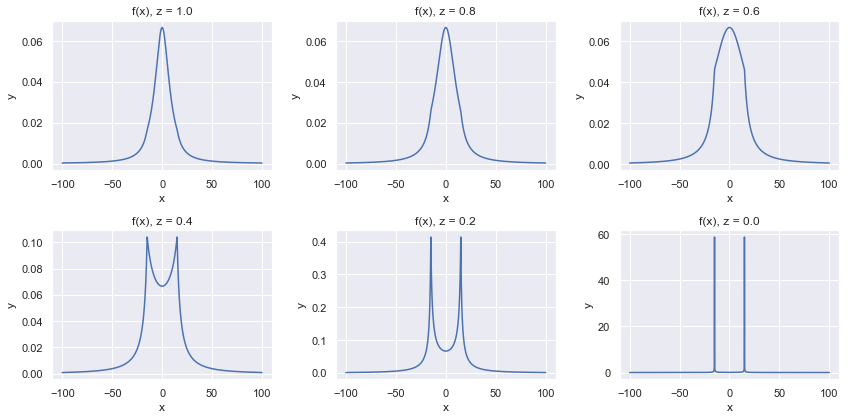

In [51]:
z = np.linspace(0, 1, 6)[::-1]
# TODO
x = np.linspace(-100, 100,10000)
def f(x, z):
    return 15/(np.sqrt((225-x**2)**2)+4*z**2*x**2)

fig, axes = plt.subplots(
    ncols=3,
    nrows=2, 
    figsize=(12, 6)
)

for z_, ax in zip(z, axes.flat):
    ax.plot(x, f(x, z_))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.set_title("f(x), z = {}".format(round(z_, 3)), fontsize=12)

fig.tight_layout()

Какое физическое явление иллюстрируют эти графики?  
Варианты в форме:
   -  __биения__
   -  резонанс  
   -  свободные колебания
   -  затухание

# Часть 2. Seaborn 

В этой части задания попробуйте использовать `seaborn`.

In [44]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

Проанализируем данные из уже знакомого [детесета](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

Считайте файл в переменную `data`.

In [46]:
data = pd.read_csv("student-mat.csv", sep=";")

# Задание  3 ★☆☆

Посмотрите на распределение девочек и мальчиков

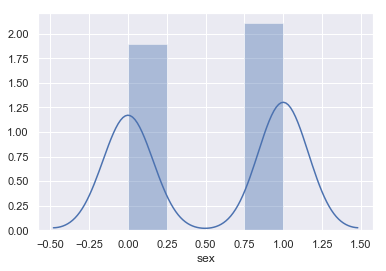

In [49]:
sns.distplot(data.sex.map({"M":0, "F":1}))

В данной выборке больше:
   - __девочек__
   - мальчиков
   - одинаковое количество девочек и мальчиков

# Задание 4 ★☆☆

Визуализируйте распределение уровня образования родителей (матери и отца отдельно). Воспользуйтесь библиотекой `seaborn`.

In [53]:
data.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [77]:
data[data["Medu"]==4].G3.count()

131

In [78]:
data[data["Medu"]!=4].G3.count()

264

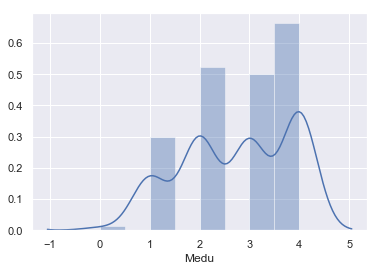

In [54]:
sns.distplot(data.Medu)

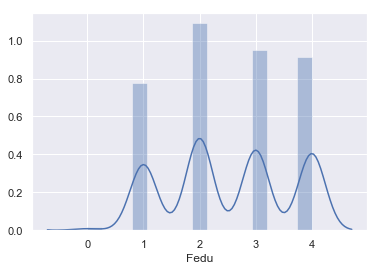

In [55]:
sns.distplot(data.Fedu)

Выберете верные утверждения:
   - среди мам больше тех, кто имеет высшее образование 
   - среди пап больше тех, кто имеет высшее образование
   - __среди пап большинство имеют 9 классов образования__
   - среди мам большинство имеют 9 классов образования 

# Задание 5 ★★☆

Посмотрите на распределение оценок 'G3' в зависимости от желания получать высшее образования (higher). Воспользуйтесь `FacetGrid`, а затем `kdeplot` (смотри семинар), также воспользуйтесь `boxplot`.

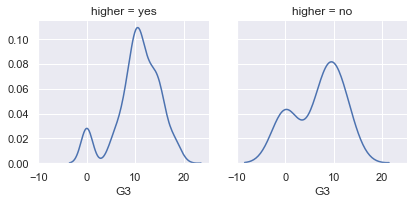

In [72]:
# TODO try to use FacetGrid + kdeplot


g = sns.FacetGrid(data, col='higher')
g.map(sns.kdeplot,'G3')

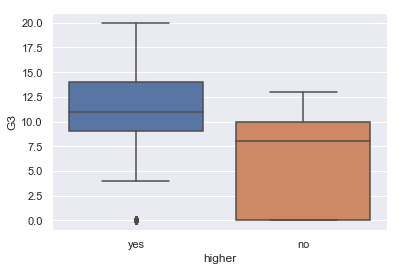

In [68]:
# TODO try to use boxplot
sns.boxplot(x="higher", y="G3", data=data)

Выберете верное утверждениe\ия:
   - __медиана оценки для тех, кто хочет получать высшее образования выше, чем у остальных__ 
   - медиана оценки для тех, кто хочет получать высшее образования ниже, чем у остальных 
   - межквартильный размах по оценкам шире у тех, кто хочет получать высшее образования  
   - __межквартильный размах по оценкам шире у тех, кто не хочет получать высшее образования__  

# Задание 6 ★★☆

Постройте `pointplot`, который отражает зависимость финальных оценок `G3` от того, кто опекун и раздельно или нет живут родители на одном графике. Отберите только те данные, для которых опекун или отец или мать.

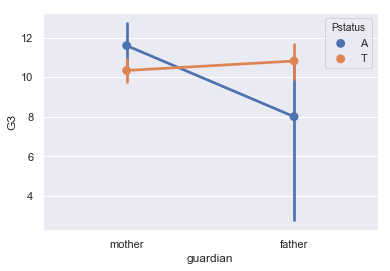

In [62]:
# TODO
# data[data["guardian"].isin(("mother", "father"))
# data.Pstatus
sns.pointplot(x="guardian", y="G3", hue='Pstatus', data=data[data["guardian"].isin(("mother", "father"))])

In [65]:
data[(data["guardian"].isin(("mother", "father"))) & (data["guardian"]=="mother") & (data["Pstatus"]=="A")].G3.mean()

11.59375

Выберете верное утверждение\ия:  
   - __по графику видно, что среднее значение оценки выше у тех, кто воспитывается только матерью__
   - по графику видно, что медиана оценки ниже у тех, кто воспитывается только отцом
   - __по графику видно, что доверительный интервал для оценок детей из полных семей меньше, чем у неполных__ 
   - по графику видно, что стандартное отклонение для оценок детей из неполных семей больше, чем у полных семей

# Задание 7 ★☆☆

Постройте линейную регрессию зависимости G3 от studytime (`lmplot` или `regplot`).

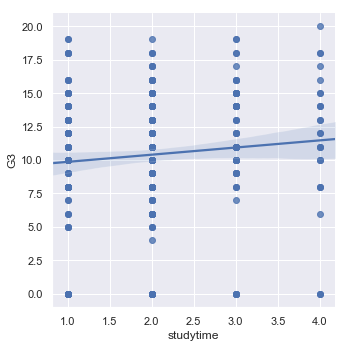

In [66]:
# TODO
sns.lmplot(x="studytime", y="G3", data=data)

Выберете верное утверждение\ия:  
   - __полученная зависимость иллюстрирует положительную зависимость между учебным временем и оценкой__
   - полученная зависимость иллюстрирует отрицательную зависимость между учебным временем и оценкой

# Задание 8 ★☆☆

Посмотрите как доступность интернета ('internet') влияет на успеваемость ('G3'). Постройте boxplot посмотрите на медиану оценок.

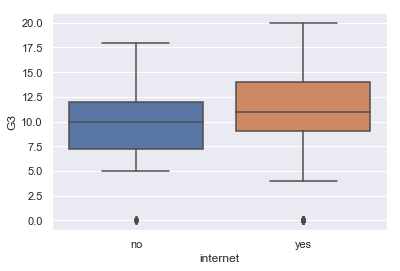

In [67]:
# TODO
sns.boxplot(x="internet", y="G3", data=data)

Выберете верное утверждение\ия:
   - __медиана оценки для тех, у кого есть доступ к интернету дома выше, чем у тех, у кого доступа нет__  
   - медиана оценки для тех, у кого нет доступа к интернету дома выше, чем у тех, у кого доступ есть